Name: Raghav Sharma <br>
Roll No: 25201313

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Shape
print("Shape:", train_df.shape)

Shape: (891, 12)


In [5]:
# Missing values
print("\nMissing Values:\n", train_df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Target distribution
print("\nTarget Distribution:\n", train_df['Survived'].value_counts())


Target Distribution:
 Survived
0    549
1    342
Name: count, dtype: int64


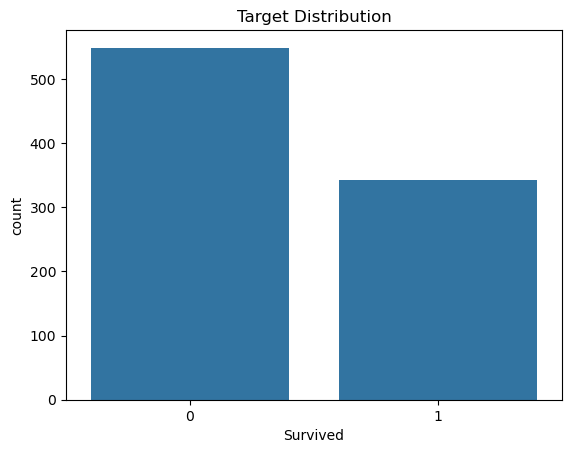

In [7]:
# Plot 1: Survival count
sns.countplot(x='Survived', data=train_df)
plt.title("Target Distribution")
plt.show()

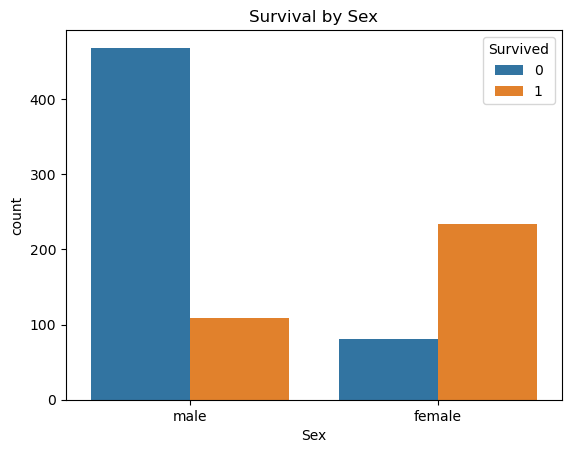

In [8]:
# Plot 2: Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Survival by Sex")
plt.show()

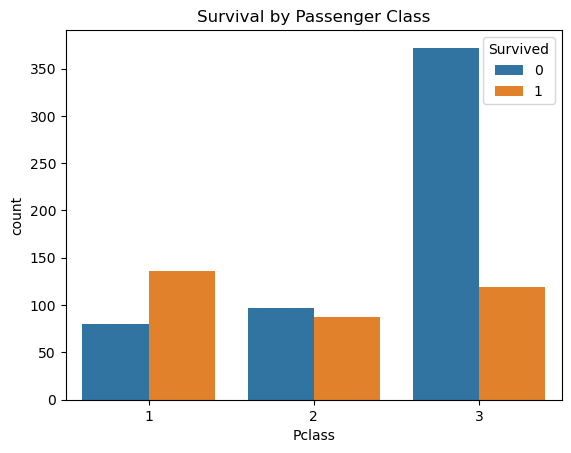

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

# SVM

In [10]:
from sklearn.svm import SVC

In [11]:
features = ['Pclass', 'Sex', 'Age', 'Fare']
df = train_df[features + ['Survived']].copy()

In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

C:\Users\Raghav Sharma\AppData\Local\Temp\ipykernel_40208\792315261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Raghav Sharma\AppData\Local\Temp\ipykernel_40208\792315261.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [13]:
X = df[features]
y = df['Survived']

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True))
])

In [16]:
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10]
}

In [17]:
grid = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(kernel='linear',
                                            probability=True))]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10]}, scoring='roc_auc')

In [18]:
print("Best C:", grid.best_params_)

Best C: {'svm__C': 1}


In [19]:
y_probs = grid.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_probs)

print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8043478260869565
